In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import sparse
from mpl_toolkits import mplot3d
from matplotlib import cm
import math
import sys


# import scipy.linalg as scl
%matplotlib notebook

%pylab

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
N=50
x = np.linspace(-5,5,N, dtype=float)
y = np.linspace(-5,5,N, dtype=float)
X,Y = np.meshgrid(x, y)
dx = x[1]-x[0]
dy = y[1]-y[0]

In [3]:
dy**2

0.04164931278633894

In [4]:
def get_potential(X,Y):
    return 0*X
V = get_potential(X,Y)


def get1_potential(X,Y):
    return (1/2)*(X**2 + Y**2)
V1 = get1_potential(X,Y)


r0=100
def V(Y):
    return np.where((Y<=r0),0,inf)

#De=7.772 #in Kj/mol
De = 9.37 #in Kj/mol
#alpha=2.447# in 1/A
alpha=2.12# in 1/(Angstrom)
#re=1.965#in (Angstrom)  
re=1.9 # in (Angstrom)  
z1=(X-re)
def get2_potential(z1):
    return De*(np.exp(-2*alpha*z1)-2*np.exp(-alpha*z1))
V2 = get2_potential(z1)+V(Y) 

In [5]:
h_bar=1.9e5 #in KJ.A.mol-1.c-2  
m=9.0761e11# in kj.mol-1.c^-2 For 3He


A=np.zeros((N,N))
for q in range(N):
    for n in range(N):
        if q==n:
            A[q,n]=-2
        elif q==n+1:
            A[q,n]=1
        elif q+1==n:
            A[q,n]=1
            
############################################## Division of the Matrix by the square step size (dz)#####################
AA=A/(dx**2)
#BB


B=np.zeros((N,N))
for q in range(N):
    for n in range(N):
        if q==n:
            B[q,n]=-2
        elif q==n+1:
            B[q,n]=1
        elif q+1==n:
            B[q,n]=1
            
############################################## Division of the Matrix by the square step size (dz)#####################
BB=B/(dy**2)
#BB


IB=np.identity(N)
IA=np.identity(N)
####################################################################################################
s1 = np.kron(AA,IB)
s2 = np.kron(IA,BB)
s =  s2 + s1
#s

T = -(((h_bar)**2)/(2*m))*s
U = sparse.diags(V1.reshape((N)**2), (0))
H = T+U

In [6]:
U

<2500x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 2500 stored elements (1 diagonals) in DIAgonal format>

In [7]:
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')

def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

-----------------Table of Values (States Index VS Energies)-------------
       0                   0.1968 
       1                   0.3909 
       2                   0.3909 
       3                   0.5794 
       4                   0.5794 


<IPython.core.display.Javascript object>


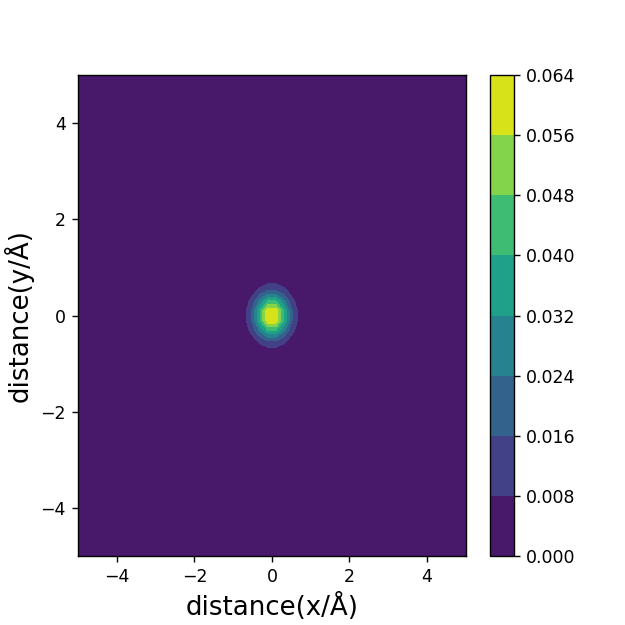

In [10]:
E=eigenvalues
print('-----------------Table of Values (States Index VS Energies)-------------')
print("{:8d} {:24.4f} ".format(0,E[0]))
print("{:8d} {:24.4f} ".format(1,E[1]))
print("{:8d} {:24.4f} ".format(2,E[2]))
print("{:8d} {:24.4f} ".format(3,E[3]))
print("{:8d} {:24.4f} ".format(4,E[4]))


plt.figure(figsize=(5,5))
plt.contourf(X,Y, get_e(0)**2, 9)
plt.ylabel('distance(y/Å)', fontsize=15)
plt.xlabel('distance(x/Å)', fontsize=15)
plt.colorbar()

<IPython.core.display.Javascript object>


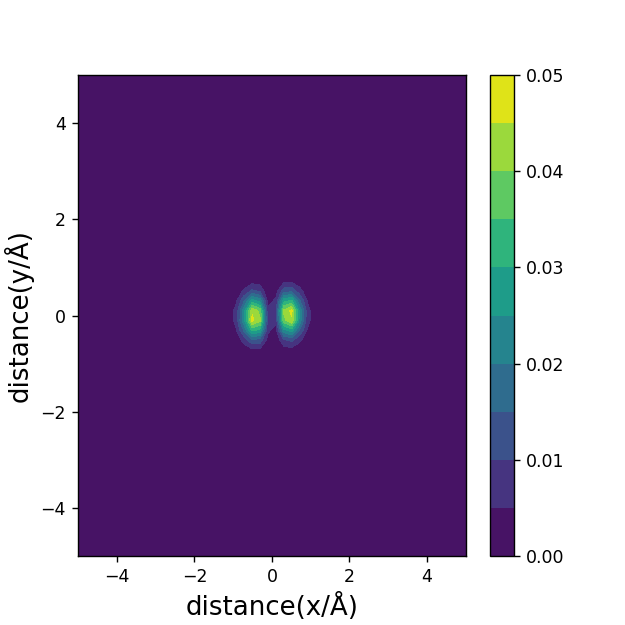

In [11]:
plt.figure(figsize=(5,5))
plt.contourf(X,Y, get_e(1)**2, 9)
plt.ylabel('distance(y/Å)', fontsize=15)
plt.xlabel('distance(x/Å)', fontsize=15)
plt.colorbar()

<IPython.core.display.Javascript object>


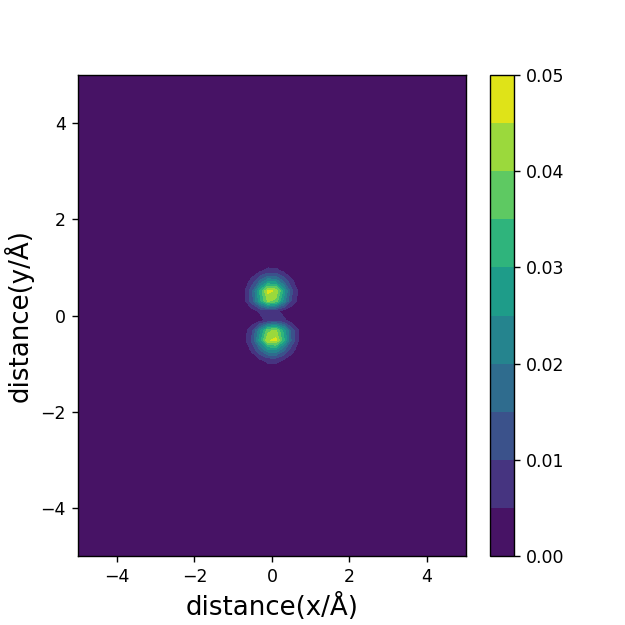

In [12]:
plt.figure(figsize=(5,5))
plt.contourf(X,Y, get_e(2)**2, 9)
plt.ylabel('distance(y/Å)', fontsize=15)
plt.xlabel('distance(x/Å)', fontsize=15)
plt.colorbar()